# Test of Algorithms for Community Detection on Coal Network

## Loading Data into Graph

In [1]:
import os, pickle, sys
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [4]:
sys.path.append(root)

In [5]:
from ffsc.flow import *

In [6]:
# dictionary assigning colors to different features of the network
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [7]:
# dictionary assigning paths to .csv files
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [8]:
gen = make_nx('coal', 'coal')

carrier: coal
recipes used: coal


In [9]:
gen.all_data_dirs = all_data_dirs

In [10]:
gen._load_dfs()

In [11]:
gen._fill_graph()

INFO:ffsc.flow.network_flow:doing step add coalmines -> railways...
INFO:ffsc.flow.network_flow:doing step add railways -> railways...
INFO:ffsc.flow.network_flow:doing step add railways <- railways...
INFO:ffsc.flow.network_flow:doing step add railways -> ports...
INFO:ffsc.flow.network_flow:ports-railways missing distance
INFO:ffsc.flow.network_flow:['Unnamed: 0', 'Unnamed: 0.1', 'PortNode:START_ID(PortNode)', 'RailwayNodeID:END_ID(PipelineNode)', ':TYPE']
INFO:ffsc.flow.network_flow:doing step add railways <- ports...
INFO:ffsc.flow.network_flow:doing step add ports -> shipping_lanes...
INFO:ffsc.flow.network_flow:ports-shipping missing distance
INFO:ffsc.flow.network_flow:['PortNode:START_ID(PortNode)', 'ShipNode:END_ID(ShippingNode)', ':TYPE', 'impedance']
INFO:ffsc.flow.network_flow:doing step add ports <- shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes -> shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes <- shipping_lanes...


In [12]:
gen._prep_flow()

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
scope power stations) 17876 28664
INFO:ffsc.flow.network_flow:checking powerstation paths...
INFO:ffsc.flow.network_flow:ii_p 0, p_count 0
INFO:ffsc.flow.network_flow:ii_p 1000, p_count 304
INFO:ffsc.flow.network_flow:ii_p 2000, p_count 567
INFO:ffsc.flow.network_flow:ii_p 3000, p_count 582
INFO:ffsc.flow.network_flow:ii_p 4000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 5000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 6000, p_count 608
INFO:ffsc.flow.network_flow:ii_p 7000, p_count 652
INFO:ffsc.flow.network_flow:ii_p 8000, p_count 705
INFO:ffsc.flow.network_flow:ii_p 9000, p_count 751
INFO:ffsc.flow.network_flow:ii_p 10000, p_count 757
INFO:ffsc.flow.network_flow:ii_p 11000, p_count 759
INFO:ffsc.flow.network_flow:ii_p 12000, p_count 780
INFO:ffsc.flow.network_flow:ii_p 13000, p_count 796
INFO:ffsc.flow.network_flo

# Community Detection

### determining which functions work on a directed graph 

In [21]:
from networkx.algorithms import community
import community as community_louvain ### this is a different package from the networkx.algorithm package 'community'

In [15]:
# best partition doesn't work on a directed graph
partition_louvain = community_louvain.best_partition(gen.G)

TypeError: Bad graph type, use only non directed graph

In [16]:
type(gen.G)

networkx.classes.digraph.DiGraph

In [44]:
# I am confused to why this doesn't work
greedy_modular_communities = list(community.greedy_modularity_communities(gen.G)) # Find communities in graph using Clauset-Newman-Moore greedy modularity maximization.

IndexError: list index out of range

In [18]:
asyn_lpa = community.asyn_lpa_communities(gen.G) # Returns communities in G as detected by asynchronous label propagation.
type(asyn_lpa)

KeyboardInterrupt: 

In [19]:
# label_propagation doesn't work on a directed graph
label_propagation = community.label_propagation_communities(gen.G) # Generates community sets determined by label propagation

NetworkXNotImplemented: not implemented for directed type

In [20]:
# asyn_fluid doesn't work on a directed graph
asyn_fluid = community.asyn_fluidc(gen.G, 30000) # Returns communities in G as detected by Fluid Communities algorithm.

NetworkXNotImplemented: not implemented for directed type

In [ ]:
print(asyn_lpa)


In [45]:
k_clique = list(community.k_clique_communities(gen.G, 5)) # Find k-clique communities in graph using the percolation method.

NetworkXNotImplemented: not implemented for directed type

<generator object k_clique_communities at 0x7f181154b6d0>

In [25]:
from networkx.algorithms import link_analysis

In [27]:
pagerank = link_analysis.pagerank(gen.G)

In [28]:
pagerank

{'coal_mine_1920': 1.6296096942258934e-07,
 'railway_node_25.9047571-24.6667781': 1.8096909028075202e-06,
 'coal_mine_1922': 1.6296096942258934e-07,
 'railway_node_53.3958054211536635.55213928019969': 1.672463408358776e-06,
 'coal_mine_1923': 1.6296096942258934e-07,
 'railway_node_52.97519310345878636.17194361255421': 1.8096909028075202e-06,
 'coal_mine_1926': 1.6296096942258934e-07,
 'railway_node_-2.18300434.3093436': 1.2607809250125433e-06,
 'coal_mine_1927': 1.6296096942258934e-07,
 'railway_node_33.7301248-16.120079': 1.8096909028075202e-06,
 'coal_mine_1929': 1.6296096942258934e-07,
 'railway_node_7.48930026.4352075': 1.8096909028075202e-06,
 'coal_mine_1930': 1.6296096942258934e-07,
 'railway_node_29.1655643-25.848461': 1.8096909028075202e-06,
 'coal_mine_1931': 1.6296096942258934e-07,
 'railway_node_30.048072-28.0005906': 1.8096909028075202e-06,
 'coal_mine_1932': 1.6296096942258934e-07,
 'railway_node_29.2035176-25.883162': 1.672463408358776e-06,
 'coal_mine_1933': 1.629609694

**Community direction analysis intially using an undirected graph**

In [12]:
from networkx.algorithms import community
import community as community_louvain ### this is a different package from the networkx.algorithm package 'community'

In [14]:
H = gen.G.to_undirected() # creating undirected graph
type(H)

networkx.classes.graph.Graph

1. greedy_modular

In [ ]:
greedy_modular_H = community.greedy_modularity_communities(H) # Find communities in graph using Clauset-Newman-Moore greedy modularity maximization.

In [ ]:
print('number of communities: '+ len(greedy_modular_H)) # number of communities
print('size of smallest community: ' + len(min(greedy_modular_H, key=len))) # size of the smallest community (last in the list)
print('size of largest community: ' + len(max(greedy_modular_H, key=len))) # size of the largest community (first in the list)

In [17]:
x = []
for i in range(0, len(greedy_modular_H)):
    a = len(greedy_modular_H[i])
    x.append(a)
len(x)

5792

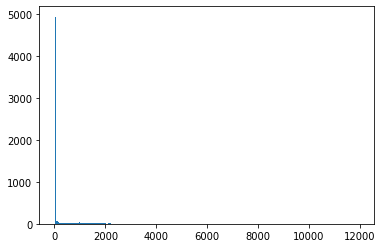

In [18]:
plt.hist(x, bins = 200)
plt.show()

In [19]:
# discarding communities under the size of 5)
y = []
for i in range(0, len(greedy_modular_H)):
    a = len(greedy_modular_H[i])
    if a >= 50:
        y.append(a)
len(y)

872

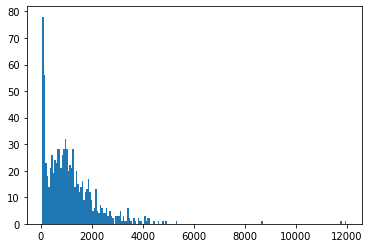

In [20]:
plt.hist(y, bins = 200)
plt.show()

frozenset({'railway_node_28.0309702-26.1963022', 'railway_node_28.0313255-26.1962696', 'railway_node_28.0282356-26.1966036', 'railway_node_28.0315269-26.1961982', 'railway_node_28.0294839-26.1964956', 'railway_node_28.0281654-26.1966576', 'railway_node_28.0316747-26.1961458', 'railway_node_28.0286717-26.1968195', 'railway_node_28.0312125-26.1963109', 'railway_node_28.032241-26.1959861', 'railway_node_28.0307096-26.1963809', 'railway_node_28.0293159-26.1966103', 'railway_node_28.0355216-26.1963114', 'railway_node_28.031271-26.196228', 'railway_node_28.028208-26.1967003', 'railway_node_28.032002-26.1960551', 'railway_node_28.0310625-26.1963657', 'railway_node_28.0309513-26.1964062', 'railway_node_28.0273307-26.1969634', 'railway_node_28.032225-26.1960264', 'railway_node_28.0307096-26.1964326', 'railway_node_28.0297972-26.1964124', 'railway_node_28.0331025-26.195691', 'railway_node_28.0279323-26.1967655', 'railway_node_28.0327896-26.195809', 'railway_node_28.0353275-26.1962293', 'railway_

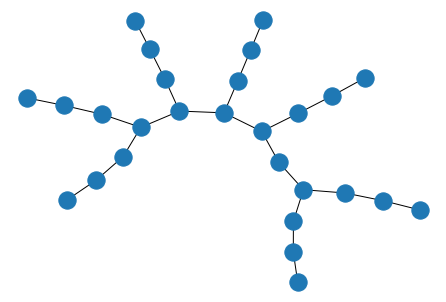

In [38]:
# print list of nodes in community (community_num = 0 is the largest community) and shows undirected network

community_num = 1000 

H_sub = H.subgraph(greedy_modular_H[community_num])
print(greedy_modular_H[community_num])
nx.draw_kamada_kawai(H_sub, with_labels=False)
plt.show()

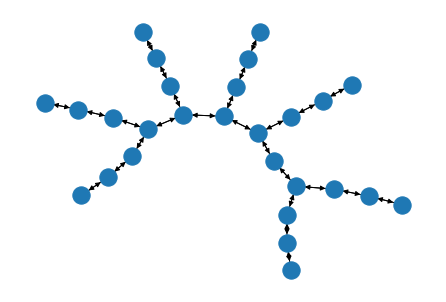

In [39]:
# shows directed network

H_sub_dir = gen.G.subgraph(greedy_modular_H[community_num])
nx.draw_kamada_kawai(H_sub_dir, with_labels=False)
plt.show()

In [23]:
community.coverage(H, greedy_modular_H) # Returns the coverage of a partition; need to use on undirected form of the graph

0.9971833775457175

> sub-section on which graph to use to visualise (Kamada-Kawai is best)

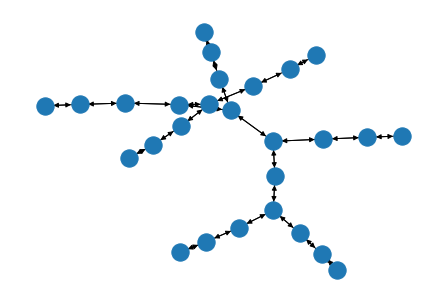

In [40]:
# standard
nx.draw(H_sub_dir, with_labels=False)
plt.show()

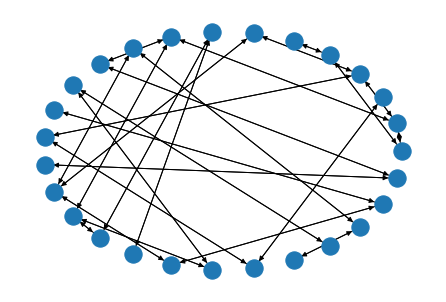

In [27]:
# circular
nx.draw_circular(H_sub_dir, with_labels=False)
plt.show()

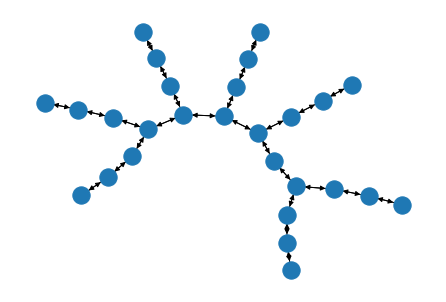

In [37]:
# Kamada-Kawai force-directed layout
nx.draw_kamada_kawai(H_sub_dir, with_labels=False)
plt.show()

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


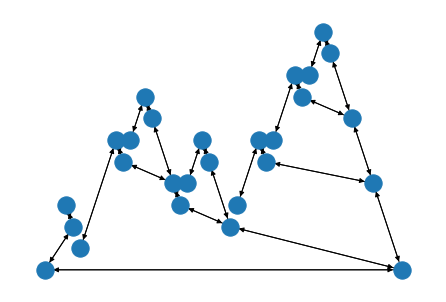

In [32]:
# planar
nx.draw_planar(H_sub_dir, with_labels=False)
plt.show()

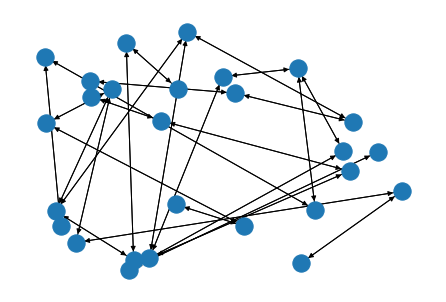

In [33]:
# random
nx.draw_random(H_sub_dir, with_labels=False)
plt.show()

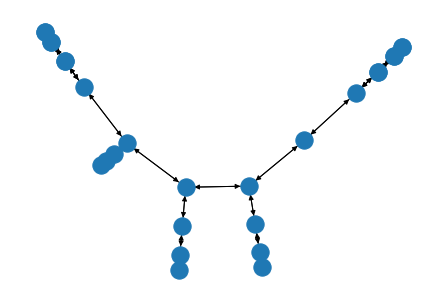

In [34]:
# spectral
nx.draw_spectral(H_sub_dir, with_labels=False)
plt.show()

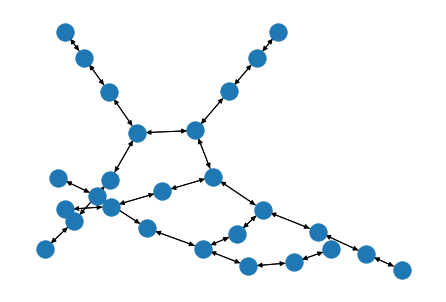

In [35]:
# spring
nx.draw_spring(H_sub_dir, with_labels=False)
plt.show()

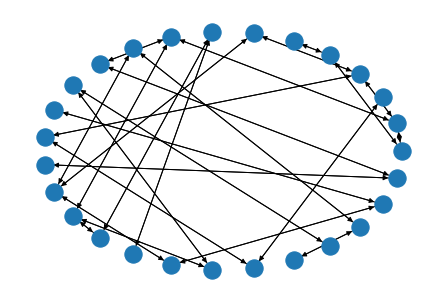

In [36]:
# shell
nx.draw_shell(H_sub_dir, with_labels=False)
plt.show()

2. community_louvain -> creates dictionary which is a pain

In [18]:
#compute the best partition
partition_H = community_louvain.best_partition(H)

In [ ]:
type(paritition_H)


3. k-clique

In [ ]:
k_clique = list(community.k_clique_communities(gen.G, 5)) # Find k-clique communities in graph using the percolation method.

In [16]:
from community import generate_dendogram

ImportError: cannot import name 'generate_dendogram' from 'community' (/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/community/__init__.py)

In [15]:
community_louvain.generate_dendogram(gen.G)

AttributeError: module 'community' has no attribute 'generate_dendogram'